####     **Import Libraries**

In [11]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FuncAnimation
import numpy as np


In [12]:
import os
import sys

PROJECT_PATH = os.path.abspath("..")
sys.path.append(PROJECT_PATH)

In [13]:
from tools.setup import plot_paper_with_vector

#### **Introduction to Linear Algebra**

**Linear Algebra** เป็นพื้นฐานสำคัญที่อยู่เบื้องหลังการทำงานของเทคโนโลยีหลายอย่างรอบตัวเรา เช่น 
ระบบแนะนำสินค้าบน platform online, การทำงานของ AI ในการแปลภาษา หรือแม้แต่การแสดงภาพเกมที่ตัวเรากำลังเล่นอยู่

แต่...ถ้าได้ยินคำว่า **"Linear Algebra"** หลายคนคงเห็นเป็นภาพสมการ ตัวเลขซับซ้อน ลอยบนอากาศเต็มไปหมด หรืออะไรที่ยากดูเป็นนามธรรมเกินเข้าใจ
จริงๆแล้ว **Linear Algebra** มันเป็นเหมือนเครื่องมือ ที่ช่วยเราอธิบายและจัดการข้อมูลในโลกของคณิตศาสตร์ได้ง่ายขึ้น

และในโปรเจคนี้ เราจะเปลี่ยนสิ่งยากๆให้เข้าใจด้วยภาพ ไม่ว่าจะเป็น vector, matrix การแปลงข้อมูลต่างๆ ทุกอย่างแสดงผ่านกราฟให้ทุกคนเห็นภาพและเข้าใจไปในทางเดียวกัน ไม่ต้องนั่งเหม่อลอยจินตนาการว่ารูปแบบมันเป็นยังไง

#### **Section: Vector**

**Concept**


**เวกเตอร์ (vector)** นึกภาพง่ายๆมันคือ "หัวลูกศร" ที่บอก **ทิศทาง** และ **ระยะทาง** เช่น เรามีกระดาษแผ่นนึงที่มีเส้นตารางแล้วเราใช้ปากกาลาก **เส้น** จากตรงกลางไปยังที่ไหนก็ได้ในกระดาษ เส้นนี้คือ **เวกเตอร์ (vector)** ซึ่งมันบอกทั้ง **ทิศทาง** และ **ระยะทาง** ว่าเราลากปากกาไปไกลแค่ไหนในทิศทางใด


**ตัวอย่าง** 

- เราเอาปากกาสีน้ำเงินลากเส้นจากตรงกลางไปทางขวาไกล 1 ช่อง 
- แล้วเราเอาปากกาสีแดงลากเส้นไปทางด้านบน 2 ช่อง 


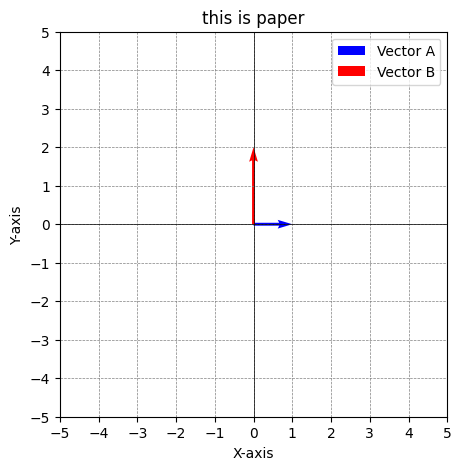

In [14]:
vectors = [[1, 0], [0, 2]]
colors = ['blue', 'red']
labels = ['Vector A', 'Vector B']

plot_paper_with_vector(vectors, colors, labels, title="this is paper")

และในภาพนี้ก็คือ **เวกเตอร์ (vector)** ที่เกิดจากการลากเส้นในกระดาษเมื่อกี้ โดยเมื่อเราพูดถึง **เวกเตอร์ (vector)** ก็ขอให้ทุกคนนึกถึงเจ้า **"หัวลูกศร"** ที่อยู่ในกระดาษที่มีตารางแบบนี้ไว้ก่อน ต่อมาเรามาคุยเรื่องกระดาษที่มีตารางกันดีกว่า ในคณิตศาสตร์เราเรียกเจ้ากระดาษนี้ว่า **ระบบพิกัดฉาก** โดยเรามีเส้น 2 เส้นที่ตัดกัน มีเส้นแกน x และเส้นแกน y โดยจะเป็นเส้นเแนวนอนและแนวตั้งตามลำดับ และเราจะมีจุดศูนย์กลางในกระดาษคือ จุด (0,0) เรียกว่าจุดกำเนิด (Origin) 

- ตัวเลขแรก (x, 0) จะบอกว่าเราลากไปในเส้นแกน x ไกลแค่ไหน ถ้าตัวเลขเป็นบวกเราก็จะลากไปทางขวาแต่ถ้าเป็นเลขติดลบเราจะลากไปทางซ้าย
- ตัวเลขตัวที่สอง (0, y) จะบอกเราลากไปในเส้นแกน y ไกลเท่าไหร่ โดยตัวเลขเป็นบวกเราก็ลากเส้นขึ้นไปแต่ถ้าเลยติดลบเราจะลากเส้นลงมา

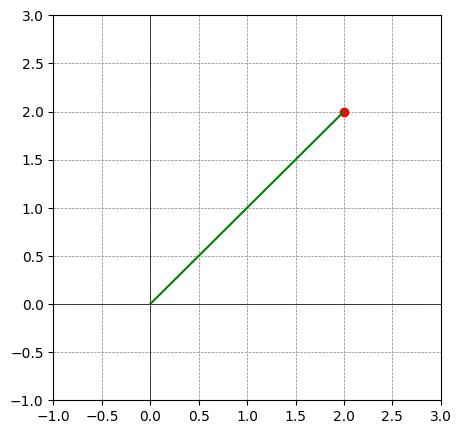

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML  # สำหรับแสดงผลใน Jupyter Notebook

# ตั้งค่ากราฟ
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# จุดเริ่มต้น
point, = ax.plot([], [], 'ro', label='Current Position')  # จุดปัจจุบัน
vector_line, = ax.plot([], [], 'g-', label='Vector Path')  # เส้นทางเวกเตอร์

# ฟังก์ชันอัปเดตเฟรมในอนิเมชั่น
def update(frame):
    if frame <= 20:  # Move along the x-axis
        x = frame / 10
        y = 0
    else:  # Move along the y-axis
        x = 2
        y = (frame - 20) / 10
    
    # อัปเดตตำแหน่งจุดและเส้น
    point.set_data([x], [y])
    vector_line.set_data([0, x], [0, y])
    return point, vector_line

# สร้างอนิเมชั่น
ani = FuncAnimation(fig, update, frames=41, interval=100, blit=True)

# แสดงอนิเมชั่นใน Jupyter Notebook
HTML(ani.to_html5_video())

